In [612]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [808]:
import openpyxl
import pandas as pd

xlsxFile = 'human_data_mining.xlsx'
sheetList = []

# openpyxl를 이용하여 시트명 가져오기

wb = openpyxl.load_workbook(xlsxFile)
for i in wb.sheetnames:
    sheetList.append(i)
    
print(sheetList)

# pandas를 이용하여 각 시트별 데이터 가져오기
xlsx = pd.ExcelFile(xlsxFile)
#df = pd.read_excel(xlsx, '가격예측(나이키 x 사카이 LD와플 블루 멀티)(2)')
df = pd.read_excel(xlsx, '가격예측(조던1레트로하이OG블랙모카)(2)')
df

['리셀가능여부', '가격예측(조던1레트로하이OG블랙모카)', '가격예측(나이키 x 사카이 LD와플 블루 멀티)', '가격예측(나이키 x 피스마이너스원에어포스1로우파라노이드)', '가격예측(나이키 x 사카이 LD와플 블루 멀티)(2)', '가격예측(조던1레트로하이OG블랙모카)(2)']


,제품명,날짜,가격,발매가,평균기온,소비자물가데이터,검색량,종가
0,조던 1 레트로 하이 OG 블랙 모카,2020-11-13,429000,"199,000원",12.2,0.6,13.14553,126.7776
1,조던 1 레트로 하이 OG 블랙 모카,2020-11-14,439000,"199,000원",12.5,0.6,3.75586,NaN
2,조던 1 레트로 하이 OG 블랙 모카,2020-11-15,391000,"199,000원",11.1,0.6,0.82159,NaN
3,조던 1 레트로 하이 OG 블랙 모카,2020-11-16,370000,"199,000원",12.4,0.6,1.97853,128.5862
4,조던 1 레트로 하이 OG 블랙 모카,2020-11-17,365000,"199,000원",15.9,0.6,1.47551,130.6616
...,...,...,...,...,...,...,...,...
499,조던 1 레트로 하이 OG 블랙 모카,2022-03-27,720000,"199,000원",8.1,4.1,1.30784,NaN
500,조던 1 레트로 하이 OG 블랙 모카,2022-03-28,723000,"199,000원",8.2,4.1,1.47551,134.8100
501,조던 1 레트로 하이 OG 블랙 모카,2022-03-29,711000,"199,000원",9.7,4.1,1.54258,139.1400
502,조던 1 레트로 하이 OG 블랙 모카,2022-03-30,700000,"199,000원",10.8,4.1,1.42521,138.5400


In [809]:
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')
df['종가'] = df['종가'].interpolate()
df['가격변동량'] = (df["가격"] - df['가격'].shift(1))
df['가격변동량'][0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [810]:
df

,제품명,날짜,가격,발매가,평균기온,소비자물가데이터,검색량,종가,가격변동량
0,조던 1 레트로 하이 OG 블랙 모카,2020-11-13,429000,"199,000원",12.2,0.6,13.14553,126.777600,0.0
1,조던 1 레트로 하이 OG 블랙 모카,2020-11-14,439000,"199,000원",12.5,0.6,3.75586,127.380467,10000.0
2,조던 1 레트로 하이 OG 블랙 모카,2020-11-15,391000,"199,000원",11.1,0.6,0.82159,127.983333,-48000.0
3,조던 1 레트로 하이 OG 블랙 모카,2020-11-16,370000,"199,000원",12.4,0.6,1.97853,128.586200,-21000.0
4,조던 1 레트로 하이 OG 블랙 모카,2020-11-17,365000,"199,000원",15.9,0.6,1.47551,130.661600,-5000.0
...,...,...,...,...,...,...,...,...,...
499,조던 1 레트로 하이 OG 블랙 모카,2022-03-27,720000,"199,000원",8.1,4.1,1.30784,134.440000,11000.0
500,조던 1 레트로 하이 OG 블랙 모카,2022-03-28,723000,"199,000원",8.2,4.1,1.47551,134.810000,3000.0
501,조던 1 레트로 하이 OG 블랙 모카,2022-03-29,711000,"199,000원",9.7,4.1,1.54258,139.140000,-12000.0
502,조던 1 레트로 하이 OG 블랙 모카,2022-03-30,700000,"199,000원",10.8,4.1,1.42521,138.540000,-11000.0


Text(0, 0.5, 'price')

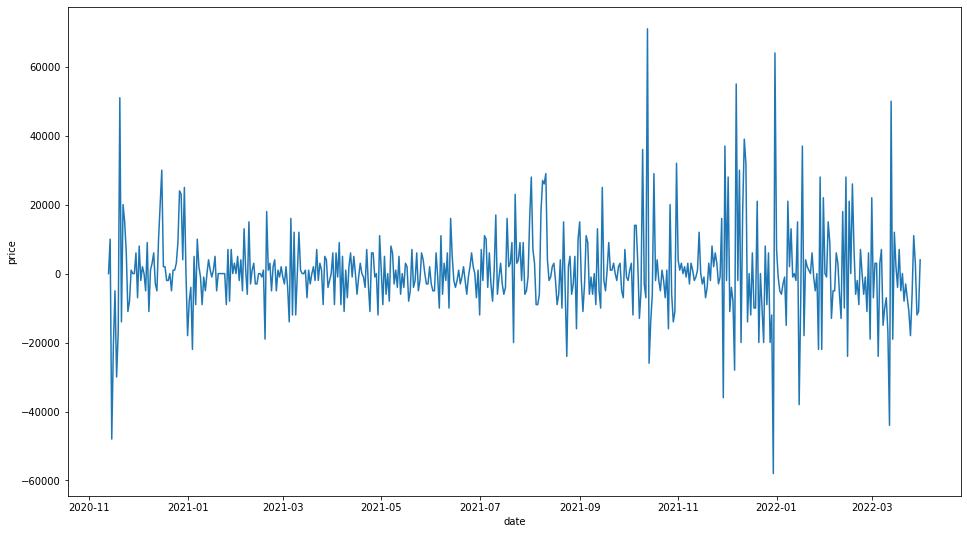

In [811]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['가격변동량'], x=df['날짜'])
plt.xlabel('date')
plt.ylabel('price')

In [812]:
#data 정규화 
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['가격','가격변동량','종가','검색량','평균기온','소비자물가데이터']
stocks_scaled = scaler.fit_transform(df[scale_cols])
stocks_scaled = pd.DataFrame(stocks_scaled)
stocks_scaled.columns = scale_cols
stocks_scaled

,가격,가격변동량,종가,검색량,평균기온,소비자물가데이터
0,0.201452,0.449612,0.155486,0.225093,0.581545,0.0
1,0.219601,0.527132,0.165667,0.064312,0.587983,0.0
2,0.132486,0.077519,0.175847,0.014068,0.557940,0.0
3,0.094374,0.286822,0.186028,0.033879,0.585837,0.0
4,0.085299,0.410853,0.221074,0.025265,0.660944,0.0
...,...,...,...,...,...,...
499,0.729583,0.534884,0.284879,0.022394,0.493562,1.0
500,0.735027,0.472868,0.291127,0.025265,0.495708,1.0
501,0.713249,0.356589,0.364247,0.026414,0.527897,1.0
502,0.693285,0.364341,0.354115,0.024404,0.551502,1.0


In [813]:
TEST_SIZE = int(len(stocks_scaled)*0.2)
print(TEST_SIZE)
WINDOW_SIZE = 5

train = stocks_scaled[:-TEST_SIZE]
test = stocks_scaled[-TEST_SIZE:]

100


In [814]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [815]:
from sklearn.model_selection import train_test_split

feature_cols = ['가격','가격변동량','종가','검색량','소비자물가데이터']
label_cols = ['가격']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 5)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((319, 5, 5), (80, 5, 5))

In [816]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((100, 5), (100, 1))

In [817]:
test_feature, test_label = make_dataset(test_feature, test_label, 5)
test_feature.shape, test_label.shape

((95, 5, 5), (95, 1))

In [818]:
import tensorflow as tf
import keras

In [819]:
from tensorflow import keras

In [820]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

from keras.layers import Flatten

In [821]:
model = tf.keras.Sequential()
model.add(LSTM(128, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='sigmoid', 
               return_sequences=False)
          )
model.add(Dense(16, activation='relu'))
#model.add(Flatten())
model.add(Dense(1))

In [822]:
import os
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=5,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
64/64 [==============================] - ETA: 0s - loss: 0.0189 - mse: 0.0379
Epoch 1: val_loss improved from inf to 0.01785, saving model to model/tmp_checkpoint.h5
64/64 [==============================] - 2s 10ms/step - loss: 0.0189 - mse: 0.0379 - val_loss: 0.0178 - val_mse: 0.0357
Epoch 2/200
61/64 [===========================>..] - ETA: 0s - loss: 0.0146 - mse: 0.0293
Epoch 2: val_loss improved from 0.01785 to 0.01442, saving model to model/tmp_checkpoint.h5
64/64 [==============================] - 0s 7ms/step - loss: 0.0147 - mse: 0.0293 - val_loss: 0.0144 - val_mse: 0.0288
Epoch 3/200
57/64 [=========================>....] - ETA: 0s - loss: 0.0120 - mse: 0.0240
Epoch 3: val_loss improved from 0.01442 to 0.00881, saving model to model/tmp_checkpoint.h5
64/64 [==============================] - 0s 7ms/step - loss: 0.0118 - mse: 0.0235 - val_loss: 0.0088 - val_mse: 0.0176
Epoch 4/200
63/64 [============================>.] - ETA: 0s - loss: 0.0084 - mse: 0.0168
Epoch 4: v

In [823]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(95, 1)

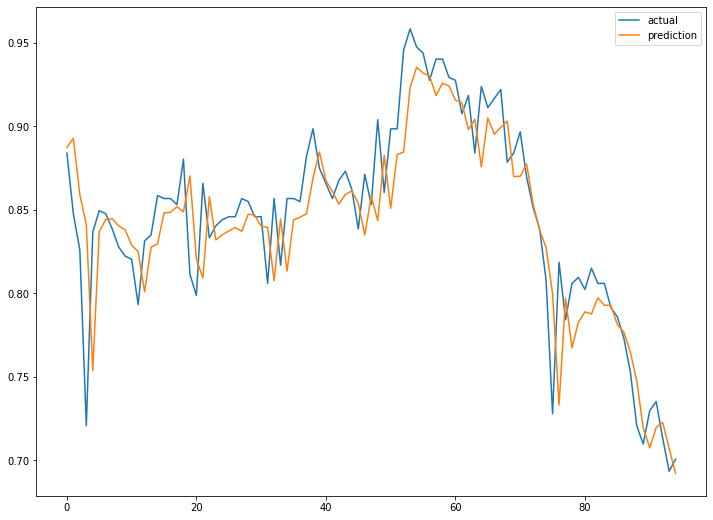

In [824]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()